<a href="https://colab.research.google.com/github/renyuanL/110_project/blob/main/_ry_%E4%B8%80%E5%80%8B%E4%BE%8B%E5%AD%90%EF%BC%8C%E8%AA%AA%E6%98%8E%E6%8E%A8%E8%AB%96%E7%B5%B1%E8%A8%88%EF%BC%8C%E5%90%AB%E4%BF%A1%E5%BF%83%E5%8D%80%E9%96%93%EF%BC%8C%E5%81%87%E8%A8%AD%E6%AA%A2%E5%AE%9A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 一個例子，說明推論統計，含信心區間，假設檢定

# 參考:

- Python for Data Analysis Part 23: Point Estimates and Confidence Intervals
http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-23-point.html

- Python for Data Analysis Part 24: Hypothesis Testing and the T-Test
http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-24.html

In [ ]:
import numpy      as np
import scipy.special  as sp
import scipy.stats   as st

import statsmodels.api as sm

import pandas       as pd
import pandas_datareader as pdr



# 先玩一下 Gamma 函數，$\Gamma()$
## https://en.wikipedia.org/wiki/Gamma_function
$
\Gamma(.5)= \sqrt{\pi} 
\\
\Gamma(1)= 1
$ 

$
\Gamma(n) = (n-1)! 
\\
\Gamma(10) = (9)! = 9*8*7*...*1*\Gamma(1)
\\
\Gamma(10.5) = (9.5)! = 9.5*8.5*7.5*...*1.5*.5*\Gamma(.5)
$ 

In [ ]:
sp.gamma(.5), \
np.pi**.5

(1.7724538509055159, 1.7724538509055159)

In [ ]:
sp.gamma(10.5)

1133278.3889487856

In [ ]:
s= np.pi**.5
for k in range(0, 10):
  s *= k+.5
s

1133278.3889487856

In [ ]:
sL= np.arange(0.5, 10.5)
sL

array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5])

In [ ]:
sL.prod() * (np.pi**.5)

1133278.3889487854

# 複習一下 $\chi^2$ 分布
## https://en.wikipedia.org/wiki/Chi-square_distribution

$\chi^2 = Z^2$

$\chi^2(df= k) = Z_1^2 + Z_2^2 +...+ Z_k^2$

count    10000.000000
mean        10.000121
std          4.486700
min          0.578431
25%          6.771012
50%          9.329583
75%         12.574878
max         35.517866
dtype: float64

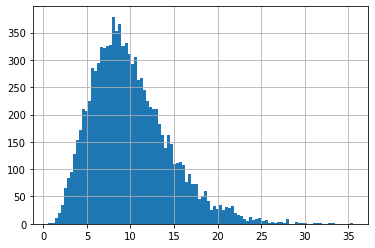

In [ ]:
# 先來製造一堆 (size= 10000) 符合此種分布的實驗數據
X2= st.chi2.rvs(df= 10,size= 10000)
X2= pd.Series(X2)
X2.hist(bins= 100)
X2.describe()

In [ ]:
# 理論值
st.chi2(df=10).mean(), \
st.chi2(df=10).var(), \
st.chi2(df=10).std()

(10.0, 20.0, 4.47213595499958)

# 再來看一下  (Student's ) T 分布
## https://en.wikipedia.org/wiki/Student%27s_t-distribution


count    10000.000000
mean         0.013670
std          1.115161
min         -5.413690
25%         -0.687756
50%          0.012373
75%          0.716731
max          5.269332
dtype: float64

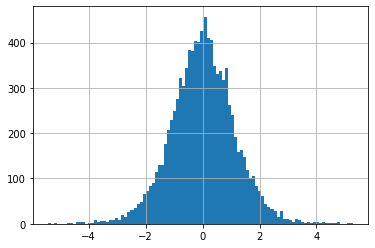

In [ ]:
# 先來製造一堆 (size= 10000) 符合此種分布的實驗數據
T=st.t.rvs(df=10,size=10000)
T=pd.Series(T)
T.hist(bins=100)
T.describe()

In [ ]:
# 理論值
st.t(df=10).mean(), \
st.t(df=10).var(), \
st.t(df=10).std()

(0.0, 1.25, 1.118033988749895)

# 回頭再來看看常態分布

## https://en.wikipedia.org/wiki/Normal_distribution

(0       0.972502
 1      -0.952605
 2       0.182506
 3       0.003312
 4       1.050440
           ...   
 9995    1.191029
 9996    1.854300
 9997    0.771019
 9998    1.267616
 9999    1.524328
 Length: 10000, dtype: float64, count    10000.000000
 mean         0.018697
 std          1.002894
 min         -3.886321
 25%         -0.668285
 50%          0.018837
 75%          0.687728
 max          3.649438
 dtype: float64)

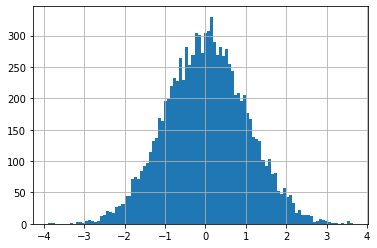

In [ ]:
# 也是先製造一堆數據

Z=st.norm.rvs(size=10000)
Z=pd.Series(Z)
Z.hist(bins=100)

Z,\
Z.describe()

(count    10000.000000
 mean         0.018697
 std          1.002894
 min         -3.886321
 25%         -0.668285
 50%          0.018837
 75%          0.687728
 max          3.649438
 dtype: float64, count    10000.000000
 mean        10.037394
 std          2.005787
 min          2.227357
 25%          8.663430
 50%         10.037673
 75%         11.375456
 max         17.298877
 dtype: float64)

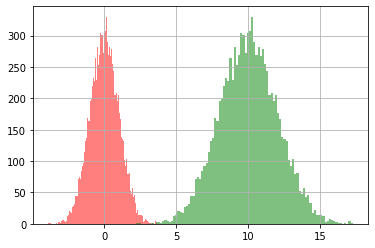

In [ ]:
Y= Z*2+10

Z.hist(bins=100, alpha=.5, color='r')
Y.hist(bins=100, alpha=.5, color='g')

Z.describe(), \
Y.describe()

count    11.000000
mean     10.479308
std       1.991146
min       7.684707
25%       9.134118
50%      10.146363
75%      11.772125
max      13.873840
dtype: float64

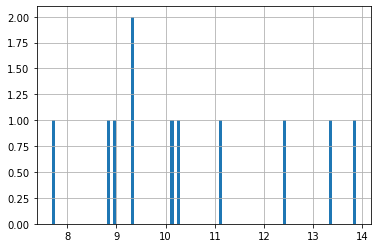

In [ ]:
smpSize= 11
smpY= Y.sample(n= smpSize)
smpY.hist(bins=100)
smpY.describe()


In [ ]:
st.sem(smpY), \
smpY.std()/smpY.size**.5

(0.6003531763649126, 0.6003531763649126)

In [ ]:
# df= 10 的 T，其95% 的信心區間可背一下以 0為中心，左右 +/- 2.228
t95_df10_Int= st.t.interval(.95, df= 10)
t95_df10_Int

(-2.2281388519649385, 2.2281388519649385)

In [ ]:
# 自己搭配 confidence interval 公式來計算

sem= t95_df10_Int[1] * smpY.std() / smpY.size**.5

y95CI= smpY.mean()-abs(sem), smpY.mean()+abs(sem) 
y95CI

(9.141637350937952, 11.816977825256394)

In [ ]:
# 直接使用 scipy.stats 的函數，參數要設好.

y95CI_直接使用st函數=  \
st.t.interval(.95, 
      df= smpY.size-1, 
      loc= smpY.mean(), 
      scale=st.sem(smpY))

y95CI_直接使用st函數



(9.141637350937952, 11.816977825256394)

# y95CI 的解釋

y95CI 的意義是指 我們製作出來 的 信心區間 smpY.mean() +/- sem 
會包含 Y.mean() 的機率有 95%

我們用以下程式碼片段來模擬及驗證此敘述。

In [ ]:

smpSize= 11
intervalL= []
for i in range(1000):
  smpY= Y.sample(n= smpSize)
  interval= st.t.interval(.95, df=smpY.size-1, 
        loc=smpY.mean(), 
        scale=st.sem(smpY))
  intervalL += [interval]

qq= pd.DataFrame(columns=['x1','x2'])
qq['x1']= [x1 for x1,x2 in intervalL]
qq['x2']= [x2 for x1,x2 in intervalL]

whether_mean_in_interval= ( (Y.mean()>=qq['x1']) & (Y.mean()<=qq['x2']) )

qq


,x1,x2
0,8.388545,10.456310
1,9.592483,11.638288
2,8.850407,12.040608
3,7.982747,11.934127
4,9.030533,10.833414
...,...,...
995,9.239166,11.501743
996,7.992178,10.871884
997,7.730050,9.943253
998,8.447832,11.157640


In [ ]:

whether_mean_in_interval


0       True
1       True
2       True
3       True
4       True
       ...  
995     True
996     True
997    False
998     True
999     True
Length: 1000, dtype: bool

In [ ]:
qq[whether_mean_in_interval]

,x1,x2
0,8.388545,10.456310
1,9.592483,11.638288
2,8.850407,12.040608
3,7.982747,11.934127
4,9.030533,10.833414
...,...,...
994,8.529190,11.549667
995,9.239166,11.501743
996,7.992178,10.871884
998,8.447832,11.157640


In [ ]:
muL= [7,8,9,10,11,12,13]
tValue, pValue_2side= st.ttest_1samp(smpY.values, muL)
pValue_1side= pValue_2side/2
muL, tValue, pValue_2side, pValue_1side

([7, 8, 9, 10, 11, 12, 13],
 array([ 7.96687768,  5.77478153,  3.58268538,  1.39058923, -0.80150692,
        -2.99360307, -5.18569922]),
 array([1.22104916e-05, 1.79004440e-04, 4.98937962e-03, 1.94518529e-01,
        4.41467237e-01, 1.34903254e-02, 4.09682925e-04]),
 array([6.10524578e-06, 8.95022200e-05, 2.49468981e-03, 9.72592644e-02,
        2.20733618e-01, 6.74516270e-03, 2.04841462e-04]))

In [ ]:
# mu0= 7,8,9 時， tValue > 2.228，對應了 pValue_2side < 0.05 或 pValue_1side < 0.025
# 由於  pValue < 臨界值 alpha 
# 因此 mu= 7,8,9 這三種假設 會被 否決

# 簡單來講，樣本證據與假設值 mu0 的 tValue 代表他們之間的 差異值 或 距離， 
# 此值的大小在 2.228 以上算是差異【顯著】(significant)，
# 它會對應 pValue 在 0.05 以下。

# 為何 |tValue| > 2.228 算是差異【顯著】，主要是因為 2.228 是靠 pValue = 0.05, 以及 df=10 算出來的
# 如果 大家約定 pValue= 0.05 以下算是 公認的 【小】機率，那麼就可認定 |tValue| > 2.228 以上叫做差異很【顯著】

# 在強調一次  tValue= 2.228 是靠 pValue = .05 = 5% 以及 df= 10 算出來的
# ==================================================================================

st.t.ppf(.05/2, df=10)

-2.2281388519649385

In [ ]:
# 令 df= 10,100,1000
# 令機率臨界值 alpha= 10%, 5%, 1%
# 把 把對應的 tValue 通通算一下。
 
st.t.ppf(.10/2, df=10), st.t.ppf(.05/2, df=10), st.t.ppf(.01/2, df=10)

(-1.8124611228107341, -2.2281388519649385, -3.169272667175838)

In [ ]:
st.t.ppf(.10/2, df=100), st.t.ppf(.05/2, df=100), st.t.ppf(.01/2, df=100)


(-1.6602343260657506, -1.983971518449634, -2.625890520586334)

In [ ]:
st.t.ppf(.10/2, df=1000), st.t.ppf(.05/2, df=1000), st.t.ppf(.01/2, df=1000)

(-1.6463788172854645, -1.9623390808264078, -2.5807546980659426)

In [ ]:
  smpY= Y.sample(n= smpSize)
  interval= st.t.interval(.95, 
        df=smpY.size-1, 
        loc=smpY.mean(), 
        scale=st.sem(smpY))
  Y.mean(), \
  smpY.values, \
  smpY.mean(), \
  smpY.std(),  \
  smpY.std()/smpY.size**.5, \
  st.sem(smpY), \
  interval


(10.037394462324043,
 array([ 9.74115414,  9.2299895 ,  8.95436004,  7.8153788 , 13.89408812,
         6.54906268,  8.45256977, 12.04027318,  7.2588186 , 10.99119737,
        10.55934044]),
 9.589657513470842,
 2.1705578663363663,
 0.6544478207629195,
 0.6544478207629195,
 (8.131456897445194, 11.04785812949649))

In [ ]:
# 不能否決假設之區域 (接受假設之區域)
aL=[]
for mu in np.linspace(interval[0], interval[1], 11):
  tV, pV= st.ttest_1samp(smpY, mu)
  aL += [(mu, tV,pV)]
aL


[(8.131456897445194, 2.228138851964939, 0.05000000000180857),
 (8.423097020650323, 1.7825110815719525, 0.10499776190472827),
 (8.714737143855453, 1.3368833111789629, 0.2108773583187624),
 (9.006377267060582, 0.8912555407859762, 0.39373097923150546),
 (9.298017390265713, 0.44562777039298673, 0.6653586583557904),
 (9.589657513470842, 0.0, 1.0),
 (9.88129763667597, -0.44562777039298673, 0.6653586583557904),
 (10.172937759881101, -0.8912555407859762, 0.39373097923150546),
 (10.46457788308623, -1.3368833111789629, 0.2108773583187624),
 (10.75621800629136, -1.7825110815719525, 0.10499776190472827),
 (11.04785812949649, -2.228138851964939, 0.05000000000180857)]

In [ ]:
# 否決假設之區域
bL=[]
for mu in np.linspace(interval[0]-10, interval[0], 11):
  tV, pV= st.ttest_1samp(smpY, mu)
  bL += [(mu, tV,pV)]
bL

[(-1.8685431025548063, 17.50819584465619, 7.84829718300592e-09),
 (-0.8685431025548063, 15.980190145387065, 1.900218841563463e-08),
 (0.13145689744519373, 14.45218444611794, 4.996309819454315e-08),
 (1.1314568974451937, 12.924178746848813, 1.4497512540972634e-07),
 (2.1314568974451937, 11.396173047579689, 4.7401484576492315e-07),
 (3.1314568974451937, 9.868167348310564, 1.7949114457135123e-06),
 (4.131456897445194, 8.34016164904144, 8.161356635237698e-06),
 (5.131456897445194, 6.812155949772314, 4.6702973704265343e-05),
 (6.131456897445194, 5.284150250503189, 0.00035552234152514637),
 (7.131456897445194, 3.756144551234064, 0.0037458034631141605),
 (8.131456897445194, 2.228138851964939, 0.05000000000180857)]

In [ ]:
# 否決假設之區域
cL=[]
for mu in np.linspace(interval[1], interval[1]+10, 11):
  tV, pV= st.ttest_1samp(smpY, mu)
  cL += [(mu, tV,pV)]
cL

[(11.04785812949649, -2.228138851964939, 0.05000000000180857),
 (12.04785812949649, -3.756144551234064, 0.0037458034631141605),
 (13.04785812949649, -5.284150250503189, 0.00035552234152514637),
 (14.04785812949649, -6.812155949772314, 4.6702973704265343e-05),
 (15.04785812949649, -8.34016164904144, 8.161356635237698e-06),
 (16.04785812949649, -9.868167348310564, 1.7949114457135123e-06),
 (17.04785812949649, -11.396173047579689, 4.7401484576492315e-07),
 (18.04785812949649, -12.924178746848813, 1.4497512540972634e-07),
 (19.04785812949649, -14.45218444611794, 4.996309819454315e-08),
 (20.04785812949649, -15.980190145387065, 1.900218841563463e-08),
 (21.04785812949649, -17.50819584465619, 7.84829718300592e-09)]

In [ ]:
# 以下 作廢

In [ ]:
import pandas_datareader as pdr

In [ ]:
Z= st.norm.rvs(size=1000)
Z= pd.Series(Z)
Z.describe()


count    1000.000000
mean        0.006276
std         0.989564
min        -3.515232
25%        -0.654751
50%        -0.007978
75%         0.696990
max         3.265240
dtype: float64

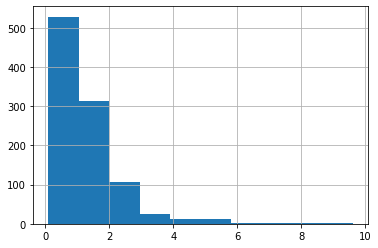

In [ ]:
(2**Z).hist()

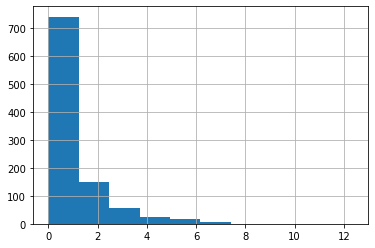

In [ ]:
(Z**2).hist()

count    1000.000000
mean       -0.036417
std         1.015646
min        -3.141987
25%        -0.744765
50%        -0.049145
75%         0.629237
max         3.803439
dtype: float64

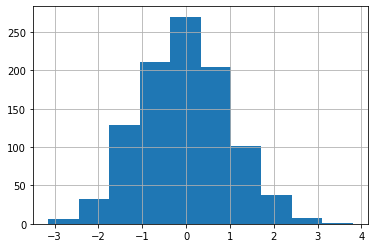

In [ ]:
n= 1000
Z= st.norm.rvs(size= n)
Z= pd.Series(Z)
#Z.plot()
Z.hist()
Z.describe()

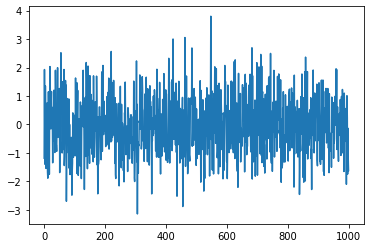

In [ ]:
Z.plot()

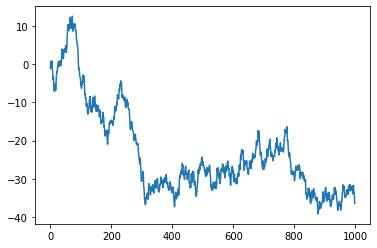

In [ ]:
Z.cumsum().plot()

In [ ]:
import numpy as np
np.log(2)

0.6931471805599453

In [ ]:
import sympy as sp

In [ ]:
x,y,z= sp.symbols('x y z')
x,y,z

(x, y, z)

In [ ]:
sp.integrate(z**4 * sp.exp(-z**2/2)
       /sp.sqrt(2*sp.pi), 
       (z, -sp.oo, sp.oo))


3

In [ ]:
value= sp.integrate(y**2 * sp.exp(-y/2) *y**(-1/2)
       /sp.sqrt(2*sp.pi)/2, 
       (y, 0, sp.oo))
value

1.87997120597325*sqrt(2)/sqrt(pi)

In [ ]:
float(value)

1.5

In [ ]:
value= sp.integrate(y**2 * sp.exp(-y/2) *y**(-1/2) /sp.gamma(1/2)/2**(1/2),
       #/sp.sqrt(2*sp.pi)/2, 
       (y, 0, sp.oo))
value


3.00000000000000

In [ ]:
f= sp.exp(-x/2)*x**(-1/2)/sp.sqrt(2*sp.pi)
f

sqrt(2)*x**(-0.5)*exp(-x/2)/(2*sqrt(pi))